In [53]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils import classification_evaluation, user_input, pipe_model

ImportError: cannot import name 'pipe_model' from 'utils' (/Users/Cyrille/Documents/aiml22/cardiovascular_labb/code/utils.py)

In [30]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

dataframe = dataframe.drop(['age', 'id'], axis=1)

In [31]:
dataframe.head()

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,140,90,3,1,0,0,1,1,55,34.927679,1
1,130,70,3,1,0,0,0,1,52,23.507805,1
2,100,60,1,1,0,0,0,0,48,23.011177,1
3,130,80,3,1,0,0,1,0,61,37.729725,1
4,130,90,3,3,0,0,1,1,62,29.983588,0


In [32]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [33]:
X_train.shape  , X_test.shape, y_train.shape, y_test.shape

((31610, 10), (13548, 10), (31610,), (13548,))

In [34]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [35]:
scaler = StandardScaler()

pipeline_knn = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipeline_log_regression = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)
parameter_grid_knn = {"knn__n_neighbors": list(range(1, 20))}

classifier_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=parameter_grid_knn,
    scoring="accuracy",
    cv=5,
)


In [36]:
# classifier_knn.best_estimator_.get_params()

In [37]:
classifier_knn.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3146
           1       0.76      0.65      0.70      3176

    accuracy                           0.72      6322
   macro avg       0.72      0.72      0.72      6322
weighted avg       0.72      0.72      0.72      6322



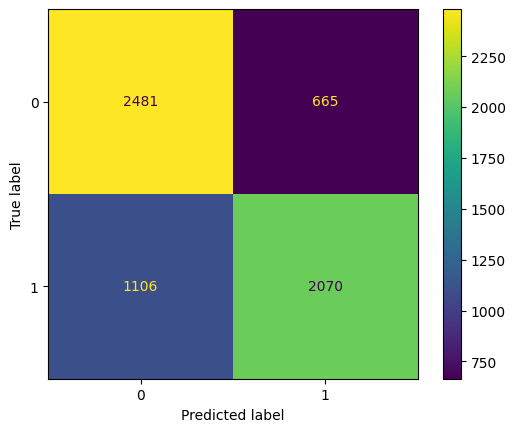

In [38]:
classification_evaluation(model=classifier_knn, x_test=X_val, y_test=y_val)

In [39]:
#Training entire X_train dataset

classifier_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [40]:
y_predictions = classifier_knn.predict(X_test)

In [41]:
print(y_predictions[:10], y_test[:10].to_list())

[1 0 0 0 0 0 1 0 1 1] [1, 1, 0, 0, 0, 0, 1, 0, 1, 1]


In [42]:
X_train

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
27382,130,80,3,1,0,0,1,60,23.422091,1
22479,140,80,2,1,0,0,1,58,25.315454,1
4567,120,80,1,1,0,0,1,64,25.315454,1
26697,130,80,1,1,0,0,1,51,24.218750,1
13114,120,80,1,1,0,0,1,59,29.996713,1
...,...,...,...,...,...,...,...,...,...,...
30316,120,80,1,1,0,0,1,54,30.486657,1
16859,110,80,1,1,0,0,1,51,30.021502,1
18132,150,90,2,2,0,0,1,49,25.249337,0
37235,120,80,1,1,0,0,1,56,20.957171,1


---

## Deployment

In [43]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1


,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [44]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [54]:
# import pipe_model from utils
pipe = pipe_model(("scaler", scaler), ("knn", KNeighborsClassifier(n_neighbors=19)))

In [55]:
pipe.predict(user1)

array([0])

In [56]:
pipe.predict(user2)

array([1])